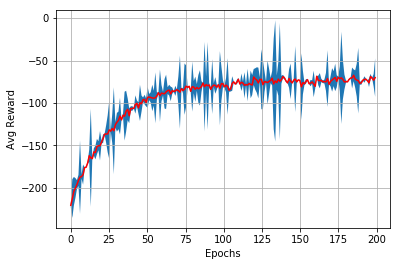

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

file_name_1 = 'Results_DQN_acrobot_test1'

with open(file_name_1, 'rb') as file:
    avgReward1 = pickle.load(file)
    
file_name_2 = 'Results_DQN_acrobot_test2'

with open(file_name_2, 'rb') as file:
    avgReward2 = pickle.load(file)
    
x = np.linspace(0,199,199)   
AvgReward  = [avgReward1,avgReward2] 
AvgReward = np.array(AvgReward)
mean = np.mean(AvgReward,0)
var = np.var(AvgReward,0)


plt.fill_between(x,mean + 1.5*var, mean-1.5*var)
plt.plot(x,mean,'r')
plt.grid(axis='both')
plt.xlabel('Epochs')
plt.ylabel('Avg Reward')
plt.show()

In [1]:
import numpy as np 
import tensorflow as tf 
from Double_InvertedPend_v0 import doublePendulum
%matplotlib inline

env = doublePendulum()

state_dim = 6
action_dim = 3

def DQN(w1,w2,w3,b1,b2,b3):

        inputs = tf.placeholder(tf.float32,[None,state_dim], name='inputs')
        
        # Create the 1st layer of Neural Network
        h1 = tf.nn.tanh(tf.matmul(inputs,w1) + b1) 

        # Create the 2nd Layer of Neural Nework (Action Inserted in the second layer)
        h2 = tf.nn.tanh(tf.matmul(h1,w2) + b2)

        # Create the output layer of the Neural Network
        out = tf.add(tf.matmul(h2,w3), b3, name='Net_output')

        return inputs, out

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('DQN_Results/acrobotDQN_net.meta')
    saver.restore(sess,tf.train.latest_checkpoint('DQN_Results/'))
    w1 = sess.run('w1:0')
    w2 = sess.run('w2:0')
    w3 = sess.run('w3:0')
    b1 = sess.run('b1:0')
    b2 = sess.run('b2:0')
    b3 = sess.run('b3:0')

    inputs, out = DQN(w1,w2,w3,b1,b2,b3)
    s = env.reset()
    for i in range(999):
        env.render()
        Qval = sess.run(out, feed_dict={inputs:np.reshape(s,(1,state_dim))})
        action = np.argmax(Qval)
        s1,r,done = env.step(action)
        s = s1
        if done:
            break

InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [6,100] rhs shape= [6,400]
	 [[Node: save_1/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@w1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](w1, save_1/RestoreV2:3)]]

Caused by op 'save_1/Assign_3', defined at:
  File "//anaconda/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-6adc59e49095>", line 27, in <module>
    saver = tf.train.import_meta_graph('DQN_Results/acrobotDQN_net.meta')
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1577, in import_meta_graph
    **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/meta_graph.py", line 498, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/importer.py", line 287, in import_graph_def
    op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [6,100] rhs shape= [6,400]
	 [[Node: save_1/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@w1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](w1, save_1/RestoreV2:3)]]
